In [1]:
import os
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits
import lightcurve

In [2]:
os.environ['lref'] = '/grp/hst/cdbs/lref/'

In [3]:
# =============
# Read HST Data
# =============

# Select object
object_name = 'ASASSN_14cn'
'''
Select from:
1. YZ_LMi
2. ASASSN_14mv
3. GP_Com
4. ASASSN_14cn
'''
data_path = '../HST_DATA/'+object_name+'/'
lc1 = lightcurve.read(data_path+'leqk40dxq_corrtag_a.fits')
print(lc1)

'''
# Print every line
print(lc1.colnames)
for i, k in enumerate(lc1):
    print (i,k['mjd'], k['flux'], k['flux_error'])
'''

Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
dataset times         mjd         ...        net         signal_to_noise
------- ------ ------------------ ... ------------------ ---------------
    1.0    0.0     59824.00290576 ... 14.493261337280273       3.8085105
    1.0    1.0 59824.002917334095 ...  10.91702651977539       3.3127127
    1.0    2.0 59824.002928908194 ... 13.969730377197266       3.7411397
    1.0    3.0   59824.0029404823 ... 12.435254096984863       3.5269196
    1.0    4.0   59824.0029520564 ... 16.228036880493164        4.029803
    1.0    5.0   59824.0029636305 ...  8.607645988464355       2.9347355
    1.0    6.0 59824.002975204596 ...  11.34323501586914       3.3760414
    1.0    7.0 59824.002986778694 ... 11.254414558410645       3.3569984
    1.0    8.0   59824.0029983528 ... 14.749921798706055       3.8409305
    1.0    9.0   59824.0030

/Users/willyu/opt/anaconda3/lib/python3.8/site-packages/lightcurve/io.py:176: RuntimeWarning: invalid value encountered in true_divide
  data['flux_error'] = np.sqrt(data['gross'] + data['background']) / (data['gross'] - data['background']) * data['flux']
/Users/willyu/opt/anaconda3/lib/python3.8/site-packages/lightcurve/io.py:178: RuntimeWarning: invalid value encountered in true_divide
  data['signal_to_noise'] = data['gross'] / np.sqrt(data['gross'] + data['background'])


"\n# Print every line\nprint(lc1.colnames)\nfor i, k in enumerate(lc1):\n    print (i,k['mjd'], k['flux'], k['flux_error'])\n"

In [4]:
from astropy.table import Table, join, vstack
corrtag = Table.read(data_path+'leqk40dxq_corrtag_a.fits')

corrtag

TIME,RAWX,RAWY,XCORR,YCORR,XDOPP,XFULL,YFULL,WAVELENGTH,EPSILON,DQ,PHA
s,pix,pix,pix,pix,pix,pix,pix,Angstrom,,,
float32,int16,int16,float32,float32,float32,float32,float32,float32,float32,int16,uint8
0.0,5960,455,5943.777,465.57574,5943.852,6454.68,464.55176,1216.5670,0.994094,0,4
0.0,5923,468,5906.281,479.42307,5906.3555,6417.1836,478.30856,1213.5780,0.99501735,0,5
0.0,5958,454,5941.874,464.5793,5941.949,6452.7773,463.50528,1216.4152,0.99414253,0,4
0.0,5862,454,5848.2124,464.66562,5848.287,6359.115,463.66742,1208.9495,0.9964304,0,4
0.0,5961,466,5943.486,477.49982,5943.561,6454.389,476.4629,1216.5438,0.9941183,0,5
0.032,5932,463,5915.5425,473.0974,5915.617,6426.446,471.95154,1214.3163,0.99477404,0,6
0.032,7058,458,7030.9717,467.3247,7031.0522,7541.881,465.95163,1303.2565,0.9755173,0,6
0.032,5972,452,5955.804,461.15015,5955.8794,6466.708,460.00415,1217.5258,0.9938028,0,6


In [5]:
lc1

dataset,times,mjd,bins,gross,background,flux,counts,error,flux_error,net,signal_to_noise
float64,float64,float64,float64,float32,float32,float64,float32,float32,float64,float64,float32
1.0,0.0,59824.00290576,1.0,14.912989,0.41972685,0.0013079381076393727,14.493261,3.9157012,0.000353370749021297,14.493261337280273,3.8085105
1.0,1.0,59824.002917334095,1.0,11.765234,0.8482078,0.0009852023115980851,10.9170265,3.5515406,0.0003205072251597952,10.91702651977539,3.3127127
1.0,2.0,59824.002928908194,1.0,14.603939,0.63420856,0.0012606925316796178,13.96973,3.9036071,0.00035227941191658953,13.969730377197266,3.7411397
1.0,3.0,59824.0029404823,1.0,12.659641,0.22438717,0.0011222143777888543,12.435254,3.589433,0.0003239268859433424,12.435254096984863,3.5269196
1.0,4.0,59824.0029520564,1.0,16.667198,0.43916214,0.0014644915831561296,16.228037,4.1359835,0.0003732499032907507,16.228036880493164,4.029803
1.0,5.0,59824.0029636305,1.0,8.820747,0.21310149,0.0007767938214390049,8.607646,3.0056362,0.00027124252029129317,8.607645988464355,2.9347355
1.0,6.0,59824.002975204596,1.0,12.185219,0.841984,0.0010236659494615528,11.343235,3.6093216,0.0003257218634562579,11.34323501586914,3.3760414
1.0,7.0,59824.002986778694,1.0,11.680908,0.4264939,0.0010156499922815236,11.254415,3.4795692,0.00031401229953102397,11.254414558410645,3.3569984
1.0,8.0,59824.0029983528,1.0,14.956886,0.20696418,0.0013311008683138295,14.749922,3.894079,0.00035141963239736213,14.749921798706055,3.8409305


Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS correction instead.
Segment A fluxcal
 using unity flux calibration instead.
 using unity TDS correction instead.
 using unity flux calibration instead.
 using unity TDS 

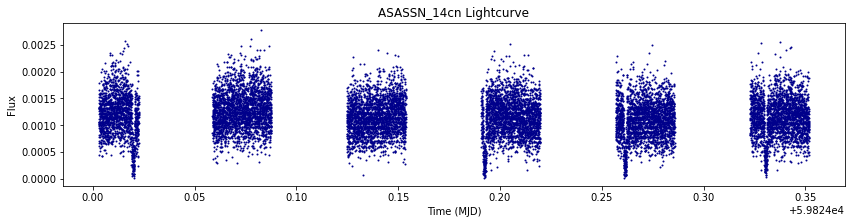

In [6]:
# ===================
# Generate Lightcurve
# ===================

plt.figure(figsize=(14, 3))

data_path = '../HST_DATA/'+object_name+'/'
lc1 = lightcurve.read(data_path+'leqk40dxq_corrtag_a.fits')
lc2 = lightcurve.read(data_path+'leqk40dzq_corrtag_a.fits')
lc3 = lightcurve.read(data_path+'leqk40e1q_corrtag_a.fits')
lc4 = lightcurve.read(data_path+'leqk40e3q_corrtag_a.fits')
lc5 = lightcurve.read(data_path+'leqk40edq_corrtag_a.fits')
lc6 = lightcurve.read(data_path+'leqk40enq_corrtag_a.fits')

lc_concat = np.concatenate((lc1, lc2, lc3, lc4, lc5, lc6))
# Getting rid of empty lines
lc_concat = lc_concat[np.where(lc_concat['flux'] > 0)]
print(lc_concat)

plt.plot(lc_concat['mjd'], lc_concat['flux'],
         '.', color='darkblue', markersize=2)
#plt.xlim(1100,1800)
#plt.ylim(-2e-15, 1e-14)
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title(object_name+' Lightcurve')
plt.show()

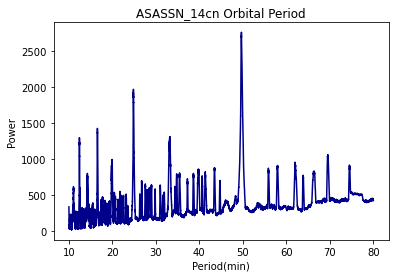

Period = 49.66715970125134 min
[10.         10.0003961  10.00079223 ... 79.93956513 79.96488411
 79.99021913]
(array([13225, 13226, 13227, ..., 16228, 16229, 16230]),)
27.998739432224326


In [7]:
# ===================
# Lightcurve Analysis
# ===================
import numpy as np
import astropy.units as u
from astropy.timeseries import BoxLeastSquares

# Compute Orbital Period (Box Least Squares)
time = lc_concat['mjd']
flux = lc_concat['flux']
flux_error = lc_concat['flux_error']
model = BoxLeastSquares(time * u.day, flux, dy=flux_error)
periodogram = model.autopower(1/1440.*u.day,
                              minimum_period=10/1440.*u.day, 
                              maximum_period=80/1440.*u.day)

# Converge to Period Frame
plt.plot(periodogram.period*1440, periodogram.power, color='darkblue')
plt.xlabel('Period(min)')
plt.ylabel('Power')
plt.title(object_name+' Orbital Period')
plt.show()

# Period
print('Period =', 
      periodogram.period[np.argmax(periodogram.power)]*1440/u.day*u.min)

x = periodogram.period.value*1440
tmp = np.where((x > 21) & (x < 28))
print(x)
print(tmp)

period_1 = np.max(x[tmp])
print(period_1)

Period = 0.03451957084


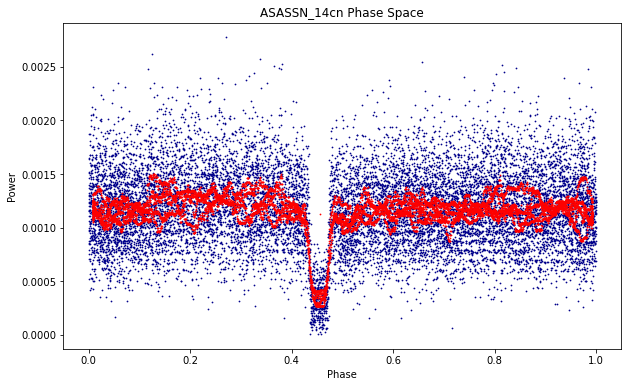

In [8]:
# ===================
# Plot in Phase Space
# ===================
import pandas as pd

lc = lc_concat #<======== Change this to corresponding lightcurve file
lc = lc[np.where(lc['flux'] > 0)]
lc_pd = pd.DataFrame(np.array(lc))
#period = periodogram.period[np.argmax(periodogram.power)]
period = 0.03451957084
#period = period_1/60/24
print('Period =', period)
lc_pd['phase'] = (lc_pd['mjd']/period) % 1

win = 50
lc_med = lc_pd.rolling(window=win).median()
lc_med = lc_med[win:]

plt.figure(figsize=(10, 6))
plt.plot(lc_pd['phase'], lc_pd['flux'], '.', color='darkblue', markersize=1.5)
plt.plot(lc_med['phase'], lc_med['flux'], 'r.', markersize=1.5)
plt.xlabel('Phase')
plt.ylabel('Power')
plt.title(object_name+' Phase Space')
plt.show()

MJD Time: 59824.0029 -- 59824.0225 | EXP Time: 0.0 -- 1694.0


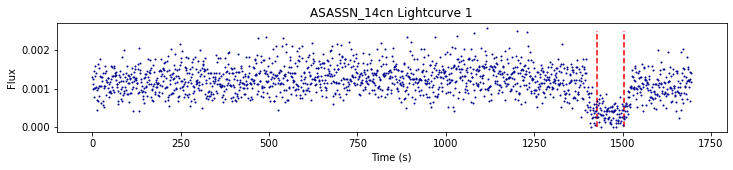

MJD Time: 59824.0587 -- 59824.0877 | EXP Time: 0.032 -- 2501.032


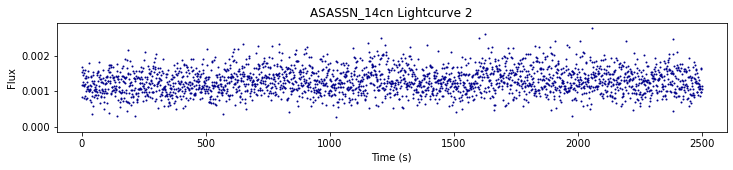

MJD Time: 59824.1248 -- 59824.1537 | EXP Time: 0.032 -- 2501.032


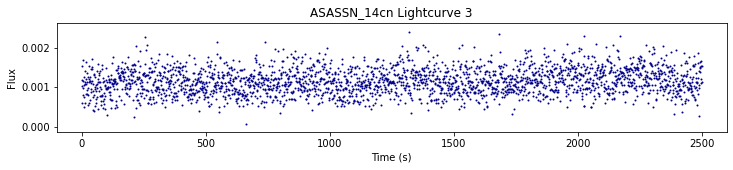

MJD Time: 59824.1908 -- 59824.2198 | EXP Time: 0.0 -- 2501.0


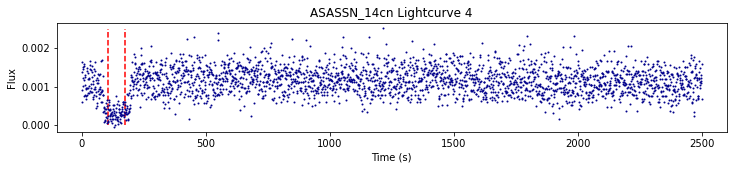

MJD Time: 59824.2569 -- 59824.2858 | EXP Time: 0.032 -- 2501.032


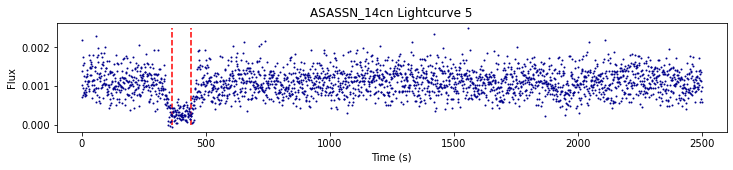

MJD Time: 59824.3229 -- 59824.3518 | EXP Time: 0.032 -- 2501.032


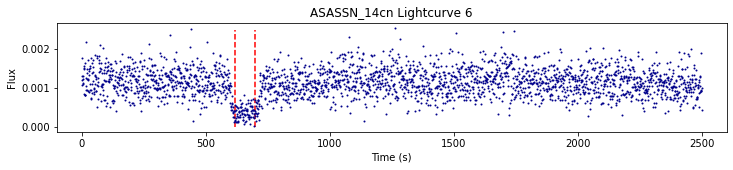

Time: 59824.00290576 -- 59824.35184110447


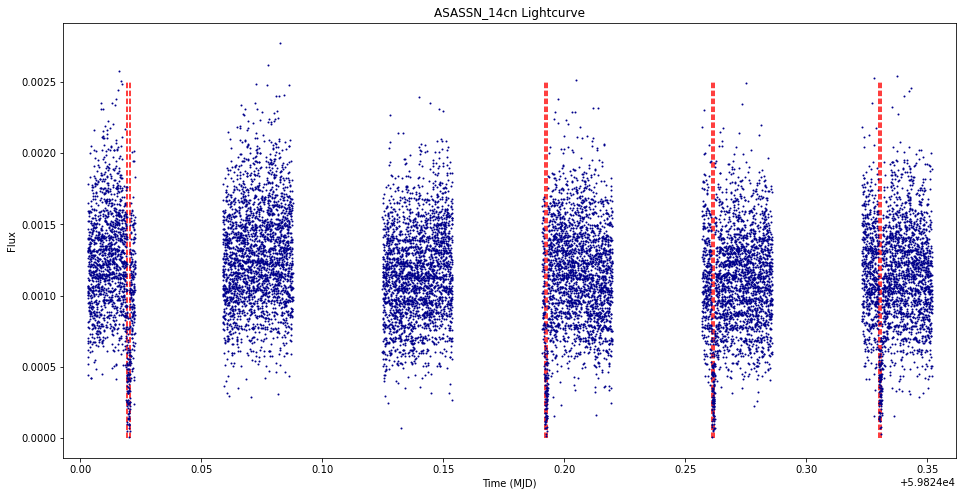

In [10]:
# ======================
# Extract eclipsing data
# ======================
day_to_s = 24*60*60
lc_list = [lc1, lc2, lc3, lc4, lc5, lc6]

eclps_exp = [[1427, 1505], 
             [1e6, 1e6],   # <===== No eclipse 
             [1e6, 1e6],   # <===== No eclipse
             [104, 175], 
             [365, 440], 
             [620, 700]]

for i in range(6):
    lc = lc_list[i]
    print('MJD Time:', round(np.min(lc['mjd']), 4), '--', round(np.max(lc['mjd']), 4), '|',
          'EXP Time:', round(np.min(lc['times']), 4), '--', round(np.max(lc['times']), 4))
    plt.figure(figsize=(12, 2))
    plt.plot(lc['times'], lc['flux'], '.', color='darkblue', markersize=2)
    plt.vlines(x=eclps_exp[i][0], ymin=0, ymax=2.5e-3, colors='r', linestyle='--')
    plt.vlines(x=eclps_exp[i][1], ymin=0, ymax=2.5e-3, colors='r', linestyle='--')
    plt.xlim(np.min(lc['times'])-1e2, np.max(lc['times'])+1e2)
    plt.xlabel('Time (s)')
    plt.ylabel('Flux')
    plt.title(object_name+' Lightcurve '+str(i+1))
    plt.show()

# Total Lightcurve
lc = lc_concat #<======= Enter corresponding lightcurve
print('Time:', np.min(lc['mjd']), '--', np.max(lc['mjd']))
plt.figure(figsize=(16, 8))

for i in range(6):
    plt.vlines(x=eclps_exp[i][0]/day_to_s+np.min(lc_list[i]['mjd']), 
               ymin=0, ymax=2.5e-3, colors='r', linestyle='--')
    plt.vlines(x=eclps_exp[i][1]/day_to_s+np.min(lc_list[i]['mjd']), 
               ymin=0, ymax=2.5e-3, colors='r', linestyle='--')

plt.xlim(np.min(lc['mjd'])-1e-2, np.max(lc['mjd'])+1e-2)
plt.plot(lc['mjd'], lc['flux'], '.', color='darkblue', markersize=2)
plt.xlabel('Time (MJD)')
plt.ylabel('Flux')
plt.title(object_name+' Lightcurve')
plt.show()

In [53]:
# Save Lightcurve in textfile

mjd        = lc_concat['mjd']
flux       = lc_concat['flux']
flux_error = lc_concat['flux_error']
ones_1     = np.ones(len(mjd))
ones_2     = np.ones(len(mjd))

# MJD to BJD correction
from astropy import time, coordinates as coord, units as u
obj_location = coord.SkyCoord("16:11:33.9749", "+63:08:31.8836", 
                              unit=(u.hourangle, u.deg), frame='icrs')
site_location = coord.EarthLocation.of_site('Greenwich') # <===== Needs a site location, placeholder
times = time.Time(lc_concat['mjd'], format='mjd', scale='utc', 
                  location=coord.EarthLocation.of_site('Greenwich'))  
ltt_bary = times.light_travel_time(obj_location)  
bjd = times.tdb + ltt_bary

header = "BJD MJD FLUX FLUX_ERROR ONES_1 ONES_2"

with open('asassn_14cn_lc.txt', 'w') as f: 
    f.write(header + "\n")
    for bjd,mjd,flux,flux_error,ones_1,ones_2 in zip(
        bjd,mjd,flux,flux_error,ones_1,ones_2): 
        f.write(f"{bjd} {mjd} {flux} {flux_error} {ones_1} {ones_2}\n")

! head asassn_14cn_lc.txt

BJD MJD FLUX FLUX_ERROR ONES_1 ONES_2
59824.00262589974 59824.00290576 0.0013079381076393727 0.000353370749021297 1.0 1.0
59824.002637473735 59824.002917334095 0.0009852023115980851 0.0003205072251597952 1.0 1.0
59824.00264904773 59824.002928908194 0.0012606925316796178 0.00035227941191658953 1.0 1.0
59824.002660621736 59824.0029404823 0.0011222143777888543 0.0003239268859433424 1.0 1.0
59824.00267219574 59824.0029520564 0.0014644915831561296 0.0003732499032907507 1.0 1.0
59824.00268376974 59824.0029636305 0.0007767938214390049 0.00027124252029129317 1.0 1.0
59824.002695343734 59824.002975204596 0.0010236659494615528 0.0003257218634562579 1.0 1.0
59824.00270691773 59824.002986778694 0.0010156499922815236 0.00031401229953102397 1.0 1.0
59824.00271849174 59824.0029983528 0.0013311008683138295 0.00035141963239736213 1.0 1.0


In [55]:
import pandas as pd
lc = pd.read_csv("asassn_14cn_lc.txt", sep=" ")
lc

,BJD,MJD,FLUX,FLUX_ERROR,ONES_1,ONES_2
0,59824.002626,59824.002906,0.001308,0.000353,1.0,1.0
1,59824.002637,59824.002917,0.000985,0.000321,1.0,1.0
2,59824.002649,59824.002929,0.001261,0.000352,1.0,1.0
3,59824.002661,59824.002940,0.001122,0.000324,1.0,1.0
4,59824.002672,59824.002952,0.001464,0.000373,1.0,1.0
...,...,...,...,...,...,...
14194,59824.351512,59824.351795,0.001888,0.000421,1.0,1.0
14195,59824.351524,59824.351806,0.000930,0.000301,1.0,1.0
14196,59824.351535,59824.351818,0.000961,0.000300,1.0,1.0
14197,59824.351547,59824.351830,0.000989,0.000323,1.0,1.0
